In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install -U pandas_profiling
!pip install -U xlrd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Th_ML/Banking.csv')

In [ ]:
df.head(10)

Loan_ID Loan_Amount_Requested Length_Employed Home_Owner  Annual_Income  \
0  10000001                 7,000        < 1 year       Rent        68000.0   
1  10000002                30,000         4 years   Mortgage            NaN   
2  10000003                24,725         7 years   Mortgage        75566.4   
3  10000004                16,000        < 1 year        NaN        56160.0   
4  10000005                17,000         8 years        Own        96000.0   
5  10000006                 4,500         2 years       Rent        30000.0   
6  10000007                18,075         4 years       Rent        85000.0   
7  10000008                15,000        < 1 year       Rent       115000.0   
8  10000009                 6,300       10+ years       Rent            NaN   
9  10000010                30,000       10+ years        Own       163000.0   

            Income_Verified     Purpose_Of_Loan  Debt_To_Income  \
0              not verified                 car           18.37   
1         VERIFIED - income  debt_consolidation           14.93   
2  VERIFIED - income source  debt_consolidation           15.88   
3  VERIFIED - income source  debt_consolidation           14.34   
4  VERIFIED - income source  debt_consolidation           22.17   
5  VERIFIED - income source         credit_card           10.88   
6         VERIFIED - income  debt_consolidation            5.65   
7         VERIFIED - income  debt_consolidation            7.97   
8              not verified  debt_consolidation           16.12   
9         VERIFIED - income  debt_consolidation           11.13   

   Inquiries_Last_6Mo  Months_Since_Deliquency  Number_Open_Accounts  \
0                   0                      NaN                     9   
1                   0                     17.0                    12   
2                   0                      NaN                    12   
3                   3                      NaN                    16   
4                   1                      NaN                    19   
5                   1                      NaN                    12   
6                   0                      NaN                     9   
7                   1                     16.0                    25   
8                   3                      NaN                     8   
9                   0                      NaN                    24   

   Total_Accounts  Gender  Interest_Rate  
0              14  Female              1  
1              24  Female              3  
2              16    Male              3  
3              22    Male              3  
4              30  Female              1  
5              15    Male              3  
6              12    Male              3  
7              31  Female              2  
8               9  Female              3  
9              43    Male              1

# Data Analysis

In [ ]:
import matplotlib
from pandas_profiling import ProfileReport
ProfileReport(df)

<ipython-input-5-a13444f51db1>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [ ]:
columns = df.columns
for i in columns:
  if df[i].dtypes == 'O':
    print(f'*************{i}****************')
    print(df[i].value_counts())


*************Loan_Amount_Requested****************
10,000    11622
12,000     9018
15,000     8459
20,000     7993
35,000     5844
          ...  
29,650        1
32,450        1
26,425        1
27,950        1
29,825        1
Name: Loan_Amount_Requested, Length: 1290, dtype: int64
*************Length_Employed****************
10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64
*************Home_Owner****************
Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64
*************Income_Verified****************
VERIFIED - income           59421
VERIFIED - income source    53015
not verified                51873
Name: Income_Verified, dtype: int64
*************Purpose_Of_Loan****************
debt_consolidation    97101
credit_car

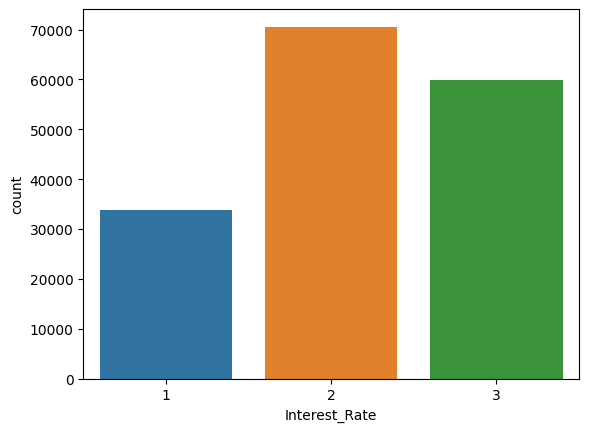

In [ ]:
sns.countplot(data = df , x = 'Interest_Rate')
plt.show()

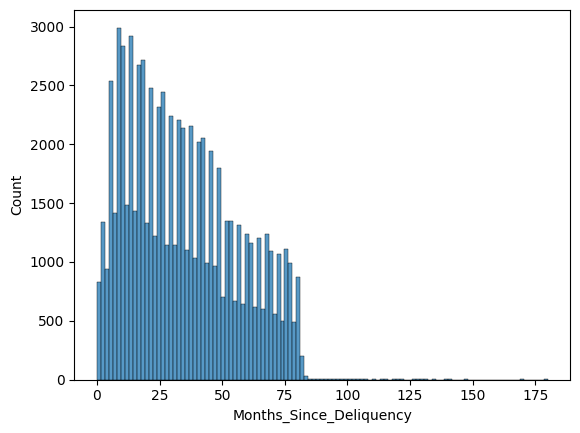

In [ ]:
sns.histplot(data = df , x = 'Months_Since_Deliquency')
plt.show()

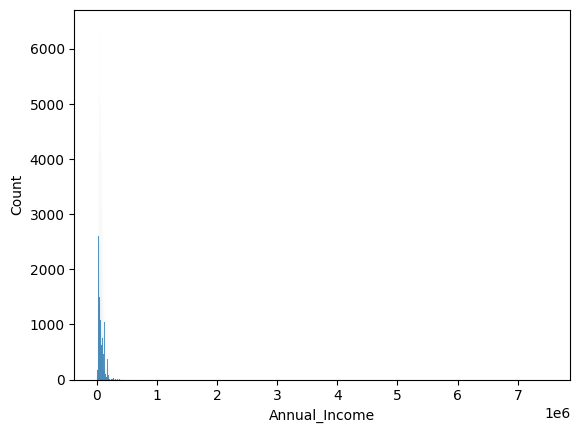

In [ ]:
sns.histplot(data = df , x = 'Annual_Income')
plt.show()

# Data Processing

In [ ]:
df.drop(columns = 'Loan_ID' , inplace = True)
df['Loan_Amount_Requested'] = df['Loan_Amount_Requested'].apply(lambda x : str(x).replace(',' , '.')).astype(np.float16)
df.replace('None' , np.NaN , inplace = True)

In [ ]:
def info_features_have_null(data):
  n = data.shape[0]
  col = data.columns
  col_null = []
  for i in col:
    if data[i].isnull().any():
      print(f'*********** {i} *************')
      print(f'Value in columns : \n{data[i].value_counts()}')
      print(f'number value is null : {data[i].isnull().sum()}')
      print(f'scale : {data[i].isnull().sum()/n*100}%')
      col_null.append(i)

  return col_null


In [ ]:
NaN_columns = info_features_have_null(df)

*********** Length_Employed *************
Value in columns : 
10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64
number value is null : 7371
scale : 4.486059801958505%
*********** Home_Owner *************
Value in columns : 
Mortgage    70345
Rent        56031
Own         12525
Other          49
Name: Home_Owner, dtype: int64
number value is null : 25359
scale : 15.433725480649265%
*********** Annual_Income *************
Value in columns : 
60000.0     5462
50000.0     4783
65000.0     4012
40000.0     3856
70000.0     3667
            ... 
50343.0        1
25012.0        1
208851.0       1
91342.0        1
24864.0        1
Name: Annual_Income, Length: 12305, dtype: int64
number value is null : 25102
scale : 15.2773128678283%
*********** Months_Since_Deliquency *************
Value in columns : 


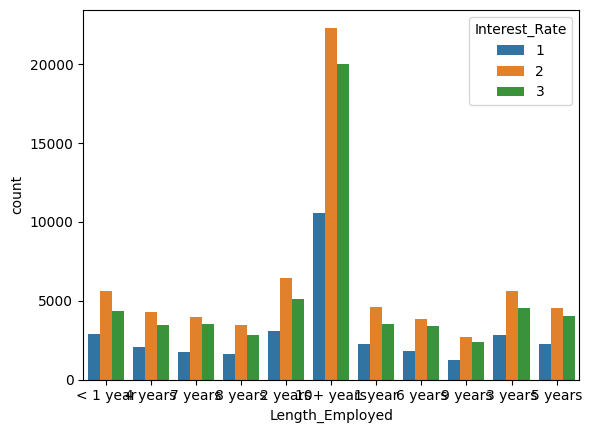

In [ ]:
sns.countplot(data = df , x ='Length_Employed' , hue = 'Interest_Rate')
plt.show()

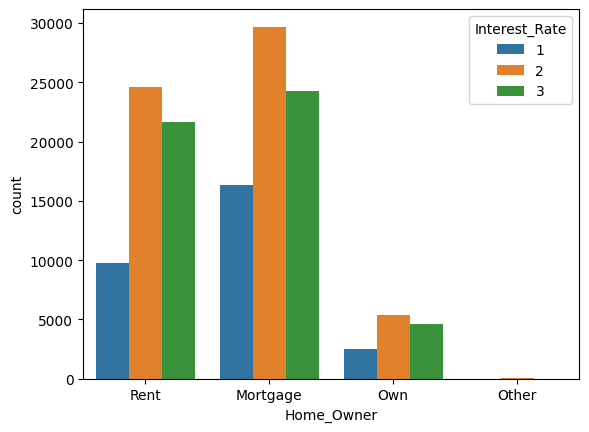

In [ ]:
sns.countplot(data = df , x ='Home_Owner' , hue = 'Interest_Rate' )
plt.show()

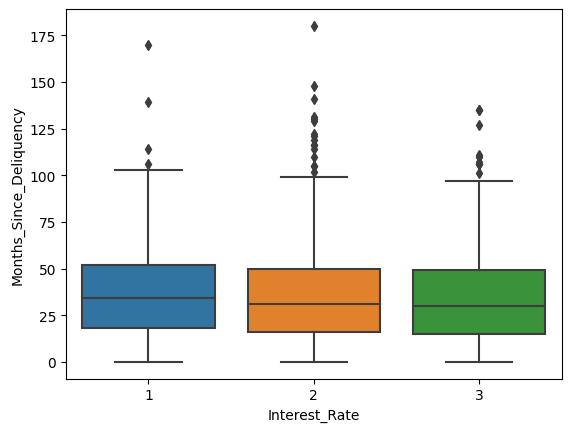

In [ ]:
sns.boxplot(data = df , x = 'Interest_Rate'  , y = 'Months_Since_Deliquency')
plt.show()

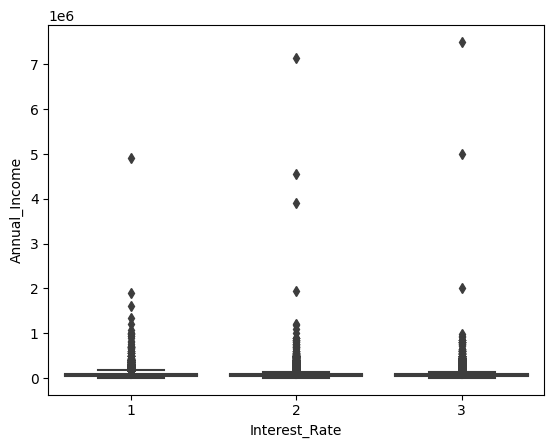

In [ ]:
sns.boxplot(data = df , x = 'Interest_Rate'  , y = 'Annual_Income')
plt.show()

In [ ]:
label = 'Interest_Rate'
feature = list(df.columns)
feature.remove(label)
X = df.loc[: , feature]
Y = df.loc[: , label]

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
categorical_col_NaN = [i for i in NaN_columns if df[i].dtypes == 'O']
simp = SimpleImputer(missing_values=np.nan , strategy = 'most_frequent')
X.loc[: , categorical_col_NaN] = simp.fit_transform(X.loc[: , categorical_col_NaN])

In [ ]:
X = pd.get_dummies(X)
col_X = X.columns

In [ ]:
imp = IterativeImputer(estimator = BayesianRidge(),initial_strategy= 'mean' , random_state= 0)
X = imp.fit_transform(X)

In [ ]:
X = pd.DataFrame(data = X , columns = col_X)

In [ ]:
def as_type(data):
  columns = data.columns
  for i in columns:
    if data[i].dtypes == 'O':
      try:
        data[i] = data[i].astype('float64')
        print('Sucessfull')
      except:
        print('lose')
  return data

X = as_type(X)

# Features enginear

<Figure size 1000x2000 with 0 Axes>

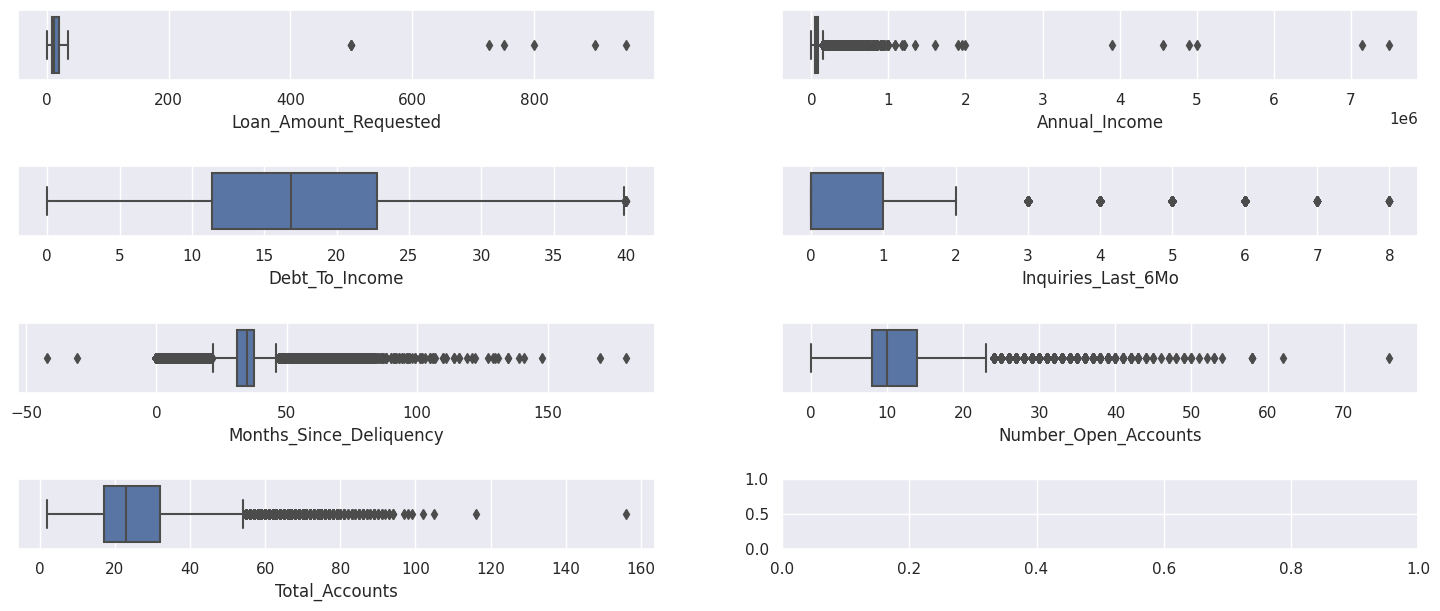

In [ ]:
def Visulize_data(data , columns):
  plt.figure(figsize = (10 , 20))
  N = len(columns)
  sns.set()
  if N%2 == 0 :
    fig , axes = plt.subplots(N//2, 2 , figsize = (10 , 7))
  else:
    fig , axes = plt.subplots(N//2 + 1, 2 , figsize = (7 , 7))

  fig.subplots_adjust(left = 3 , right = 5,hspace=1.25)
  #fig(figsize = (10 , 10))
  #$fig.Figure(figsize = (10 , 10))
  for i in range(N):
    sns.boxplot(data , x = columns[i] , ax= axes[i//2 , i%2])
    axes[i//2 , i%2].set_xlabel(columns[i])

numerical_feature = [i for i in df.columns if df[i].dtypes != 'O']
numerical_feature.remove('Interest_Rate')
Visulize_data( X , numerical_feature)

In [ ]:
def handle_outlier(data , List_features):
  for i in List_features:
    Q = data[i].quantile([0.75 , 0.25])
    IQR = Q[0.75] - Q[0.25]
    data.loc[data[i] > Q[0.75] + IQR, i] = Q[0.75] + IQR
    data.loc[data[i] < Q[0.25] - IQR , i] = Q[0.25] - IQR

  return data

feturer_o = ['Loan_Amount_Requested' , 'Annual_Income' ,'Inquiries_Last_6Mo', 'Months_Since_Deliquency','Number_Open_Accounts','Total_Accounts']
X= handle_outlier(X.copy() , feturer_o)

<Figure size 1000x2000 with 0 Axes>

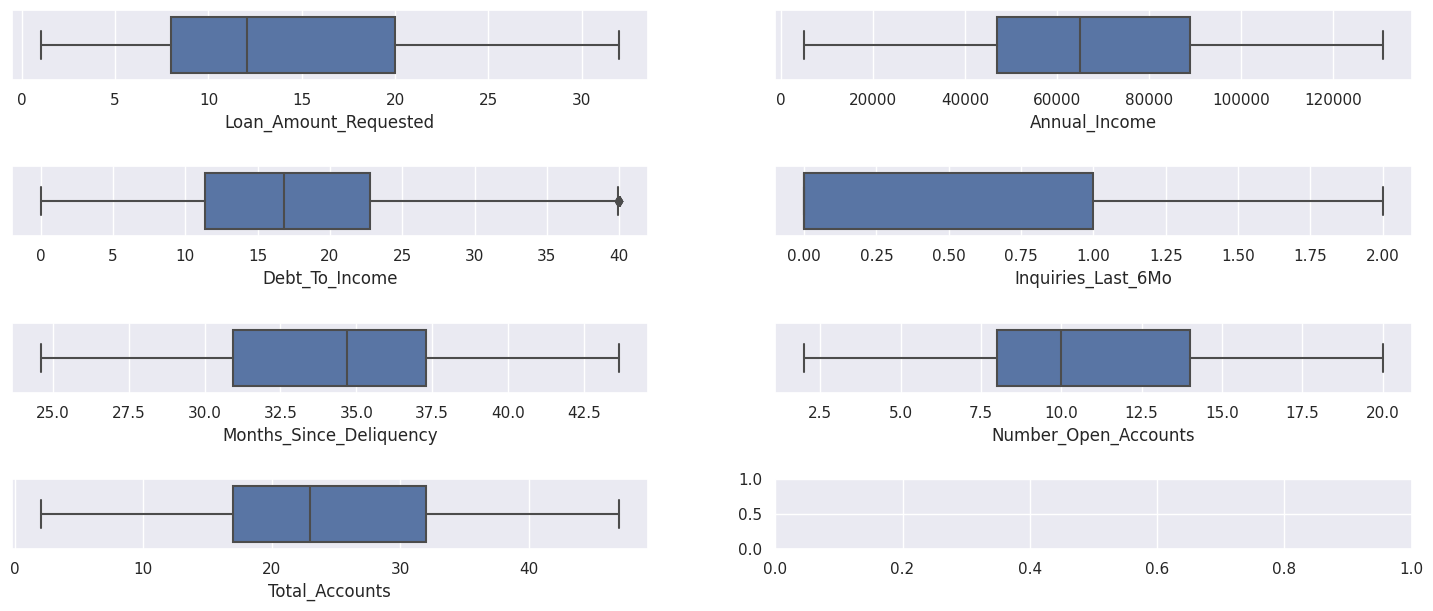

In [ ]:
numerical_feature = [i for i in df.columns if df[i].dtypes != 'O']
numerical_feature.remove('Interest_Rate')
Visulize_data( X , numerical_feature)

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42
TEST_SIZE = 0.2

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size= TEST_SIZE , random_state= RANDOM_STATE)

# Build model

## Decision Tree

In [ ]:
from sklearn.metrics import classification_report
def calculate_performance(y_true, y_pred):
    report = classification_report(y_true,y_pred)
    print("Classification Report\n",report)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
def build_model(X, y):
    clf = DecisionTreeClassifier()
    scaler = StandardScaler()
    # handle missing value
# BayesianRidge better than KNeighborsRegressor
    param_grid = {
    #'Iter__estimator':estimators,
    'tree__criterion': ["gini", "entropy", "log_loss"],
    'tree__max_depth' : [10 , 15 , 20]
    }
    pipe = Pipeline([('scaler', scaler),("tree", clf)])
    model = GridSearchCV(pipe, param_grid, scoring="recall", n_jobs=-1)
    model.fit(X,y)

    return model

In [ ]:
model_Deci = build_model(X_train , Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [ ]:
pred = model_Deci.predict(X_test)
calculate_performance(Y_test, pred)

Classification Report
               precision    recall  f1-score   support

           1       0.46      0.21      0.29      6721
           2       0.48      0.61      0.54     14018
           3       0.55      0.54      0.54     12123

    accuracy                           0.50     32862
   macro avg       0.50      0.45      0.46     32862
weighted avg       0.50      0.50      0.49     32862



In [ ]:
!pip install -U catboost

In [ ]:
from catboost import CatBoostClassifier

def build_model_RF_Iter(X, y):
    clf = CatBoostClassifier()
    scaler = StandardScaler()
    n_estimators = [70 , 80 , 100]

    param_grid = {
    'tree__n_estimators': n_estimators,
    }

    # Todo: Input your scaler and logistic model into pipeline
    pipe = Pipeline([('scaler', scaler),("tree", clf)])
    model = GridSearchCV(pipe, param_grid, scoring="accuracy", n_jobs=-1 )
    # Todo: fit your model with X, y
    model.fit(X,y)

    return model



In [ ]:
model_RF_Iter = build_model_RF_Iter(X_train, Y_train)

Learning rate set to 0.5
0:	learn: 1.0262114	total: 197ms	remaining: 15.5s
1:	learn: 0.9945950	total: 327ms	remaining: 12.7s
2:	learn: 0.9764948	total: 462ms	remaining: 11.9s
3:	learn: 0.9671127	total: 596ms	remaining: 11.3s
4:	learn: 0.9596650	total: 734ms	remaining: 11s
5:	learn: 0.9537693	total: 850ms	remaining: 10.5s
6:	learn: 0.9495529	total: 971ms	remaining: 10.1s
7:	learn: 0.9471666	total: 1.09s	remaining: 9.86s
8:	learn: 0.9446248	total: 1.22s	remaining: 9.6s
9:	learn: 0.9424372	total: 1.31s	remaining: 9.18s
10:	learn: 0.9404820	total: 1.44s	remaining: 9s
11:	learn: 0.9390338	total: 1.56s	remaining: 8.86s
12:	learn: 0.9377831	total: 1.69s	remaining: 8.68s
13:	learn: 0.9360862	total: 1.8s	remaining: 8.51s
14:	learn: 0.9346918	total: 1.93s	remaining: 8.37s
15:	learn: 0.9336070	total: 2.05s	remaining: 8.2s
16:	learn: 0.9328459	total: 2.17s	remaining: 8.04s
17:	learn: 0.9320621	total: 2.3s	remaining: 7.92s
18:	learn: 0.9313336	total: 2.4s	remaining: 7.69s
19:	learn: 0.9307348	total

In [ ]:
pred = model_RF_Iter.predict(X_test)
calculate_performance(Y_test, pred)

Classification Report
               precision    recall  f1-score   support

           1       0.52      0.26      0.35      6721
           2       0.50      0.63      0.56     14018
           3       0.59      0.57      0.58     12123

    accuracy                           0.53     32862
   macro avg       0.54      0.49      0.49     32862
weighted avg       0.54      0.53      0.52     32862



# MLP

In [ ]:
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [ ]:
encoder = LabelEncoder()
encoder.fit(Y_train)
encoded_Y = encoder.transform(Y_train)
# convert integers to dummy variables (i.e. one hot encoded)
encode_Y_test = encoder.transform(Y_test)
dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y_test = np_utils.to_categorical(encode_Y_test)

In [ ]:
from keras.layers.serialization import activation
# define baseline model
def baseline_model(n_input):
 # create model
 model = Sequential([
    Dense(128,input_dim =n_input , activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(units = 3 , activation = 'softmax')
 ])
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar =StandardScaler().fit(X_train)
X_scaler_train = scalar.fit_transform(X_train)
X_scaler_test = scalar.fit_transform(X_test)
n= X_scaler_train.shape[1]

In [ ]:
model_base = baseline_model(n)

In [ ]:
model_base.fit(X_scaler_train , dummy_y ,epochs=100, batch_size=50 , validation_split= 0.2)

Epoch 1/100
2104/2104 [==============================] - 10s 4ms/step - loss: 0.9768 - accuracy: 0.5015 - val_loss: 0.9517 - val_accuracy: 0.5229
Epoch 2/100
2104/2104 [==============================] - 7s 3ms/step - loss: 0.9514 - accuracy: 0.5211 - val_loss: 0.9460 - val_accuracy: 0.5272
Epoch 3/100
2104/2104 [==============================] - 8s 4ms/step - loss: 0.9459 - accuracy: 0.5233 - val_loss: 0.9433 - val_accuracy: 0.5297
Epoch 4/100
2104/2104 [==============================] - 7s 3ms/step - loss: 0.9432 - accuracy: 0.5272 - val_loss: 0.9415 - val_accuracy: 0.5292
Epoch 5/100
2104/2104 [==============================] - 7s 4ms/step - loss: 0.9402 - accuracy: 0.5281 - val_loss: 0.9428 - val_accuracy: 0.5274
Epoch 6/100
2104/2104 [==============================] - 7s 3ms/step - loss: 0.9379 - accuracy: 0.5307 - val_loss: 0.9396 - val_accuracy: 0.5304
Epoch 7/100
2104/2104 [==============================] - 7s 3ms/step - loss: 0.9365 - accuracy: 0.5320 - val_loss: 0.9407 - val_a

In [ ]:
Y_pred = model_base.predict(X_scaler_test)
Y_pred = np.argmax(Y_pred , axis = -1)

1027/1027 [==============================] - 2s 2ms/step


In [ ]:
y_pred_dumi = pd.get_dummies(Y_pred)
calculate_performance(dummy_y_test, y_pred_dumi)

Classification Report
               precision    recall  f1-score   support

           0       0.49      0.25      0.33      6721
           1       0.49      0.64      0.55     14018
           2       0.57      0.53      0.55     12123

   micro avg       0.52      0.52      0.52     32862
   macro avg       0.52      0.47      0.48     32862
weighted avg       0.52      0.52      0.51     32862
 samples avg       0.52      0.52      0.52     32862



## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
def Model_LogisticRegression(X , y):
  LR = LogisticRegression(penalty= 'elasticnet' ,multi_class= 'multinomial' , solver= 'saga' , n_jobs= -1 , random_state = 0 )
  scaler = StandardScaler()
  #penalty = ['l1' , 'l2' ]
  l1_ratio = [0.1 , 0.3 , 0.5 , 0.7]
  param_grid = {
        #'LogisticR__kernel': penalty,
        'LogisticR__l1_ratio' : l1_ratio
    }
  pipe = Pipeline([('scaler', scaler),("LogisticR", LR)])
  model = GridSearchCV(pipe, param_grid, scoring="accuracy", n_jobs=-1 , cv = 5)
  # Todo: fit your model with X, y
  model.fit(X,y)
  return model

In [ ]:
model_Logistic_R = Model_LogisticRegression(X_train ,Y_train )

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
pred = model_Logistic_R.predict(X_test)
calculate_performance(Y_test, pred)

Classification Report
               precision    recall  f1-score   support

           1       0.51      0.15      0.23      6721
           2       0.48      0.66      0.56     14018
           3       0.57      0.55      0.56     12123

    accuracy                           0.51     32862
   macro avg       0.52      0.45      0.45     32862
weighted avg       0.52      0.51      0.49     32862



## BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
moel_GaussianNB = GaussianNB().fit(X_train , Y_train)

In [ ]:
pred = moel_GaussianNB.predict(X_test)
calculate_performance(Y_test, pred)

Classification Report
               precision    recall  f1-score   support

           1       0.48      0.10      0.16      6721
           2       0.46      0.75      0.57     14018
           3       0.53      0.39      0.45     12123

    accuracy                           0.48     32862
   macro avg       0.49      0.41      0.39     32862
weighted avg       0.49      0.48      0.44     32862

